Student Details

Name: Vipul Popat

ID: 18195121

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

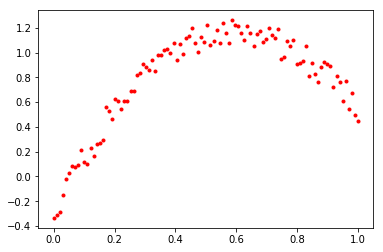

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

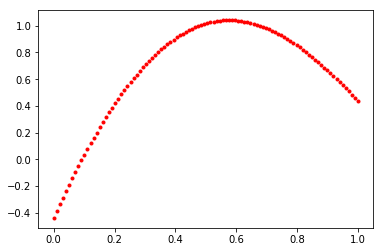

In [3]:
plt.plot(X,y_nf,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]
#lambdas = np.linspace(0,1,1000)
lambdas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001] 
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


# Task 4.1 
Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. Pick at most 1000 values! Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

Text(0.5, 1.0, 'E_in, E_out for lambda between [0,1]')

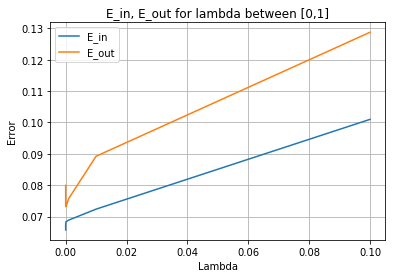

In [9]:
# plot ein, eout for lambda > 0
plt.plot(lambdas[1:],ein[1:], label='E_in')
plt.plot(lambdas[1:],eout[1:], label='E_out')

plt.xlabel("Lambda")
plt.ylabel("Error")
plt.legend(loc='best')
plt.grid(True)
plt.title("E_in, E_out for lambda between [0,1]")


Looks like E_in and E_out are the smallest for the smallest value of lambda. The E_in and E_out curves also cross each other whih results in E_out being less than than E_in before the cross happens

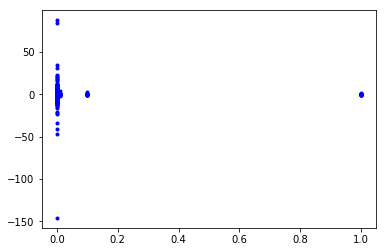

In [10]:
plt.plot(lambdas,weights,'b.')
plt.show()

#### Above plot confirms that as lambda increases the weight coefficient increases as well, In a way it shows that the regularization penalty is evident when lambda is near zero i.e. near zero does not make much difference in weight coefficient

In [11]:
Eout_min_index = np.argmin(eout)
candidate_lambda = lambdas[Eout_min_index]

print("Lowest index of E_out is {} and candidate_lambda is {}".format(Eout_min_index, candidate_lambda));
print("E_out with regularization is {} and without is {}".format(eout[0], eout[Eout_min_index]));
print("Difference in E_out :", eout[0] - eout[Eout_min_index])

Lowest index of E_out is 4 and candidate_lambda is 0.0001
E_out with regularization is 0.17827467819953693 and without is 0.07313912886726204
Difference in E_out : 0.1051355493322749


# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

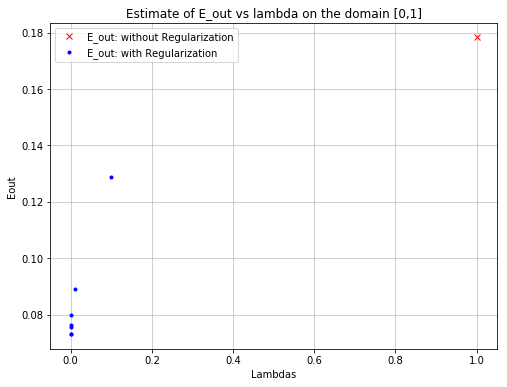

In [12]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(8,6))

# Plot for all 1000 values of lambdas[0,1]
plt.plot(lambdas[0], eout[0], 'rx', label='E_out: without Regularization')
plt.plot(lambdas[1:], eout[1:], 'b.', label='E_out: with Regularization')

plt.title('Estimate of E_out vs lambda on the domain [0,1]')
plt.xlabel('Lambdas')
plt.ylabel('Eout')

plt.legend()
plt.grid(alpha=0.75)
plt.show()

#### Above plot concludes that eout without regularization resulted in high error red X, where as with the regularization it resulted in low error blue dots..

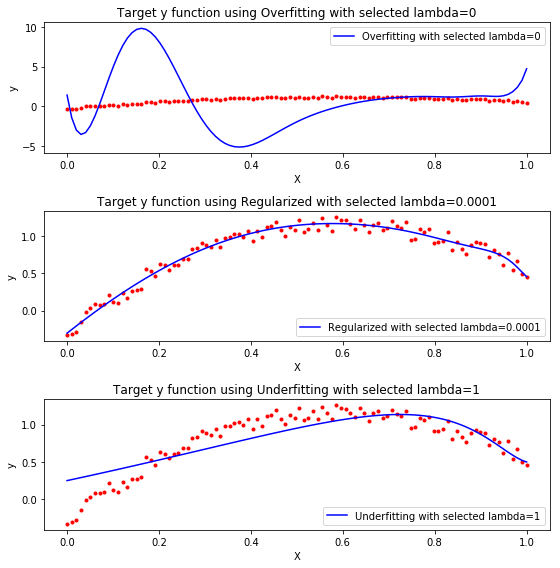

In [13]:
def experiment(order, l):
    X_order = transPoly(X,order)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, train_size=0.9, random_state = 9)

    weights = weights_reg(X_train,y_train,l)
    e_in = calc_error(weights, X_train,y_train)
    e_out = calc_error(weights, X_test,y_test)
    
    # make predictions using linear regression
    pred    = lin_reg(weights, X_trans)
    
    return pred

fig = plt.figure(figsize=(8, 8)) 
    
ls = [0, candidate_lambda, 1]
plot_titles = ['Overfitting', 'Regularized', 'Underfitting']

for i in range(1,4):

    plt.subplot(3,1,i)
    pred = experiment(50, ls[i-1])
        
    plt.plot(X,y,'r.')
    plt.xlabel('X')
    plt.ylabel('y')
    lbl = plot_titles[i-1] + ' with selected lambda=' + str(ls[i-1])
    plt.title('Target y function using ' + lbl)
    plt.plot(X, pred  , 'b', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.

In [14]:
def experiment_with_cv(X, y, lambdas, num_folds=10):
    
    eout_lambda = []
    X_order = transPoly(X,50)
    
    for l in lambdas:
        ein=[]
        eout=[]
        avg_eout=[]
        
        # Split data into training and test data sets
        kf = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

        # random_state fixed to get reproducible (and 'good'! :-)) results
        for train_index, test_index in kf.split(X_order):
            # Training data
            X_train_cv = X_order[train_index]
            y_train_cv = y[train_index]
    
            # Testing data
            X_test_cv = X_trans[test_index]
            y_test_cv = y[test_index]
   
            w = weights_reg(X_train_cv,y_train_cv,l)
            ein.append(calc_error(w,X_train_cv,y_train_cv))
            local_eout = calc_error(w,X_test_cv,y_test_cv)
            eout.append(local_eout)
        
        avg_eout = np.mean(eout)
        print("Lambda = {} Average E_out over 10 folds = {} ".format(l, avg_eout))
        eout_lambda.append(avg_eout)
    
    min_overall_eout_index = np.argmin(eout_lambda)
    candidate_lambda_cv = lambdas[min_overall_eout_index]
    print ("Candidate LAMBDA using K-Fold cross validation: {}".format(candidate_lambda_cv))
    
    return candidate_lambda_cv, eout_lambda[min_overall_eout_index]


In [15]:
lambdas_cv = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
kfold_lambda, kfold_eout = experiment_with_cv(X,y,lambdas_cv) # Using original lambdas with 1000 values results in kernel crash..

print ("\nOPTIMAL LAMBDA without K-Fold cross validation: {}".format(candidate_lambda))

Lambda = 1 Average E_out over 10 folds = 0.19126639446499635 
Lambda = 0.1 Average E_out over 10 folds = 0.10612393069201272 
Lambda = 0.01 Average E_out over 10 folds = 0.07765857404974823 
Lambda = 0.001 Average E_out over 10 folds = 0.07415573335808251 
Lambda = 0.0001 Average E_out over 10 folds = 0.07459191612163245 
Lambda = 1e-05 Average E_out over 10 folds = 0.0751845523612256 
Lambda = 1e-06 Average E_out over 10 folds = 0.07981857606348444 
Candidate LAMBDA using K-Fold cross validation: 0.001

OPTIMAL LAMBDA without K-Fold cross validation: 0.0001


#### With K FOLD cross validation the optimal lambda is 0.0001 and without K fold cross validation the optimal lambda is 0.0001. Hence there is a difference in the values retrieved taking both the routes

# Task 6 (CE6002)
Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?
Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?


### Ridge CV

Eout on RidgeCV : 0.10940470297240244
Score : 0.935531387257519
Best estimated regularization parameter, lambda : 0.1
Weights : [ 0.00000000e+00  2.81994148e+00 -2.10186139e-01 -9.07483595e-01
 -8.27516502e-01 -5.77568398e-01 -3.40365798e-01 -1.57859163e-01
 -2.97524005e-02  5.45733512e-02  1.06319827e-01  1.34750836e-01
  1.46920720e-01  1.48014465e-01  1.41778291e-01  1.30892896e-01
  1.17262812e-01  1.02230926e-01  8.67345779e-02  7.14183607e-02
  5.67155392e-02  4.29069308e-02  3.01636134e-02  1.85780103e-02
  8.18658791e-03 -1.01352852e-03 -9.05237212e-03 -1.59781986e-02
 -2.18509408e-02 -2.67374292e-02 -3.07079228e-02 -3.38336138e-02
 -3.61848579e-02 -3.78299452e-02 -3.88342730e-02 -3.92598182e-02
 -3.91648304e-02 -3.86036865e-02 -3.76268644e-02 -3.62809998e-02
 -3.46090032e-02 -3.26502157e-02 -3.04405919e-02 -2.80128959e-02
 -2.53969066e-02 -2.26196220e-02 -1.97054622e-02 -1.66764656e-02
 -1.35524771e-02 -1.03513278e-02 -7.08900321e-03]


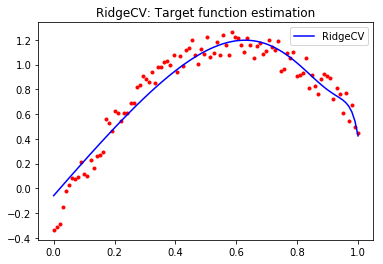

In [16]:
# Set the regularization parameters (trying for all 1000 values, takes some time to run)
alpha_list = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10]
folds = 10

ridgeCV_clf = RidgeCV(alphas=alpha_list, cv=folds)
ridgeCV_clf.fit(X_trans, y)

score  = ridgeCV_clf.score(X_trans, y) 
predictions    = ridgeCV_clf.predict(X_trans)

ridgecv_eout     = calc_error(ridgeCV_clf.coef_, X_test, y_test)
print("Eout on RidgeCV :", ridgecv_eout)

print("Score :", score)
print("Best estimated regularization parameter, lambda :", ridgeCV_clf.alpha_)
print("Weights :", ridgeCV_clf.coef_)

plt.title('RidgeCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions,'b-', label='RidgeCV')

plt.legend(loc='best')
plt.show()

The Lambda derived by RidgeCV is 0.019 which is different than the one derived by K-Fold CV which is 0.001. The weight vector also signifies that none of the weights are penalized here to drop down to 0 and hence it uses all the weights

### Lasso CV

Eout on LassoCV : 0.273024123857712
score : 0.9691520999159291
Best estimated regularization parameter, l: 0.0001
Weights : [ 0.          4.77642297 -3.49350986 -0.73461541 -0.          0.
  0.          0.          0.26938444  0.1323464   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.03920386 -0.05317398 -0.04577945
 -0.03495408 -0.02490185 -0.01559645 -0.00700806 -0.         -0.
 -0.         -0.         -0.        ]


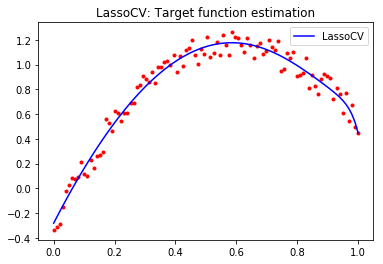

In [17]:
# Set the regularization parameters (trying for all 1000 values)
alpha_list = [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10]
folds = 10

classifier = LassoCV(alphas=alpha_list, cv=folds, random_state=5, n_jobs=-2)
classifier.fit(X_trans, y)


score  = classifier.score(X_trans, y) 
predictions    = classifier.predict(X_trans)

lasso_eout     = calc_error(classifier.coef_, X_test, y_test)
print("Eout on LassoCV :", lasso_eout)

print("score :", score)
print("Best estimated regularization parameter, l:", classifier.alpha_)
print("Weights :", classifier.coef_)

plt.title('LassoCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions, 'b-', label='LassoCV')

plt.legend(loc='best')
plt.show()

### Observe the resulting Eout, and lambda compare these to previous results. What do you see? Is this what you expected?

In [18]:
print('Eout for Ridge CV            :', ridgecv_eout)
print('Eout for Lasso CV            :', lasso_eout)
print('KFold Cross Validation Error :', kfold_eout)
print('Eout with regularization on linear regression :',  eout[Eout_min_index])

Eout for Ridge CV            : 0.10940470297240244
Eout for Lasso CV            : 0.273024123857712
KFold Cross Validation Error : 0.07415573335808251
Eout with regularization on linear regression : 0.07313912886726204


The E_outs above show that there is a huge variance. 
- Lasso having the highest error of all  and it is on the lines that the weights were penalized and moved to 0
- Ridge has a high error as compare to KFold CV or regularized linear regression but better than Lasso CV. 

The Lambda derived by LassoCV is 0.0001 which is around the same as the one derived by K-Fold CV which is 0.0001. The weight vector also been significantly penalized and only 12 of the 50 weights/features have been selected.
This clearly shows that Lasso excluded 43 features. The less number of weights i.e a sparse weight matrix could also aid to computational advantage

**The key difference between the above two techniques is that Lasso shrinks the less important feature's coefficients to 0 thus removing the features altogether. So this works well with the case when we have a large number of features.**